## Problem statement.

## Build a recommender system by using cosine simillarties score.




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

### Importing data

In [17]:
book_df = pd.read_csv(r"book.csv")

In [3]:
book_df

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


In [18]:
# Checking the summary of the data 
book_df.describe()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
count,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.423000,0.247500,0.43100,0.282000,0.214500,0.241000,0.276000,0.113500,0.037000,0.048500,0.108500
std,0.494159,0.431668,0.49534,0.450086,0.410578,0.427797,0.447129,0.317282,0.188809,0.214874,0.311089
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.00000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
# Checking datatypes
book_df.dtypes

ChildBks     int64
YouthBks     int64
CookBks      int64
DoItYBks     int64
RefBks       int64
ArtBks       int64
GeogBks      int64
ItalCook     int64
ItalAtlas    int64
ItalArt      int64
Florence     int64
dtype: object

In [6]:
# Finding Missing Values
book_df[book_df.isnull().any(axis=1)]

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence


## Using Box Plot to detect the outliers

Indices of outliers from the box plots:
[0, 3, 5, 6, 7, 9, 12, 13, 14, 15, 18, 19, 20, 25, 26, 27, 28, 30, 32, 33, 35, 36, 40, 42, 43, 44, 48, 50, 52, 54, 55, 56, 58, 61, 63, 68, 70, 73, 80, 81, 82, 83, 84, 87, 92, 94, 95, 96, 97, 98, 100, 103, 104, 106, 108, 110, 111, 114, 116, 118, 119, 120, 123, 125, 126, 127, 128, 130, 131, 133, 137, 138, 139, 142, 146, 148, 154, 157, 158, 159, 160, 162, 163, 166, 167, 171, 172, 173, 174, 176, 179, 181, 183, 185, 186, 187, 193, 195, 200, 201, 203, 206, 207, 215, 217, 220, 224, 225, 228, 231, 235, 237, 239, 242, 245, 246, 249, 252, 265, 266, 270, 271, 272, 273, 274, 278, 284, 285, 288, 289, 291, 293, 294, 295, 297, 301, 302, 304, 307, 309, 310, 312, 314, 320, 323, 327, 328, 330, 331, 332, 334, 335, 337, 338, 339, 340, 342, 343, 344, 347, 348, 349, 350, 351, 353, 354, 355, 358, 360, 361, 362, 364, 366, 368, 369, 372, 373, 374, 376, 378, 380, 382, 383, 384, 386, 389, 392, 394, 399, 401, 404, 405, 406, 410, 411, 414, 415, 417, 418, 419, 420, 422, 425, 

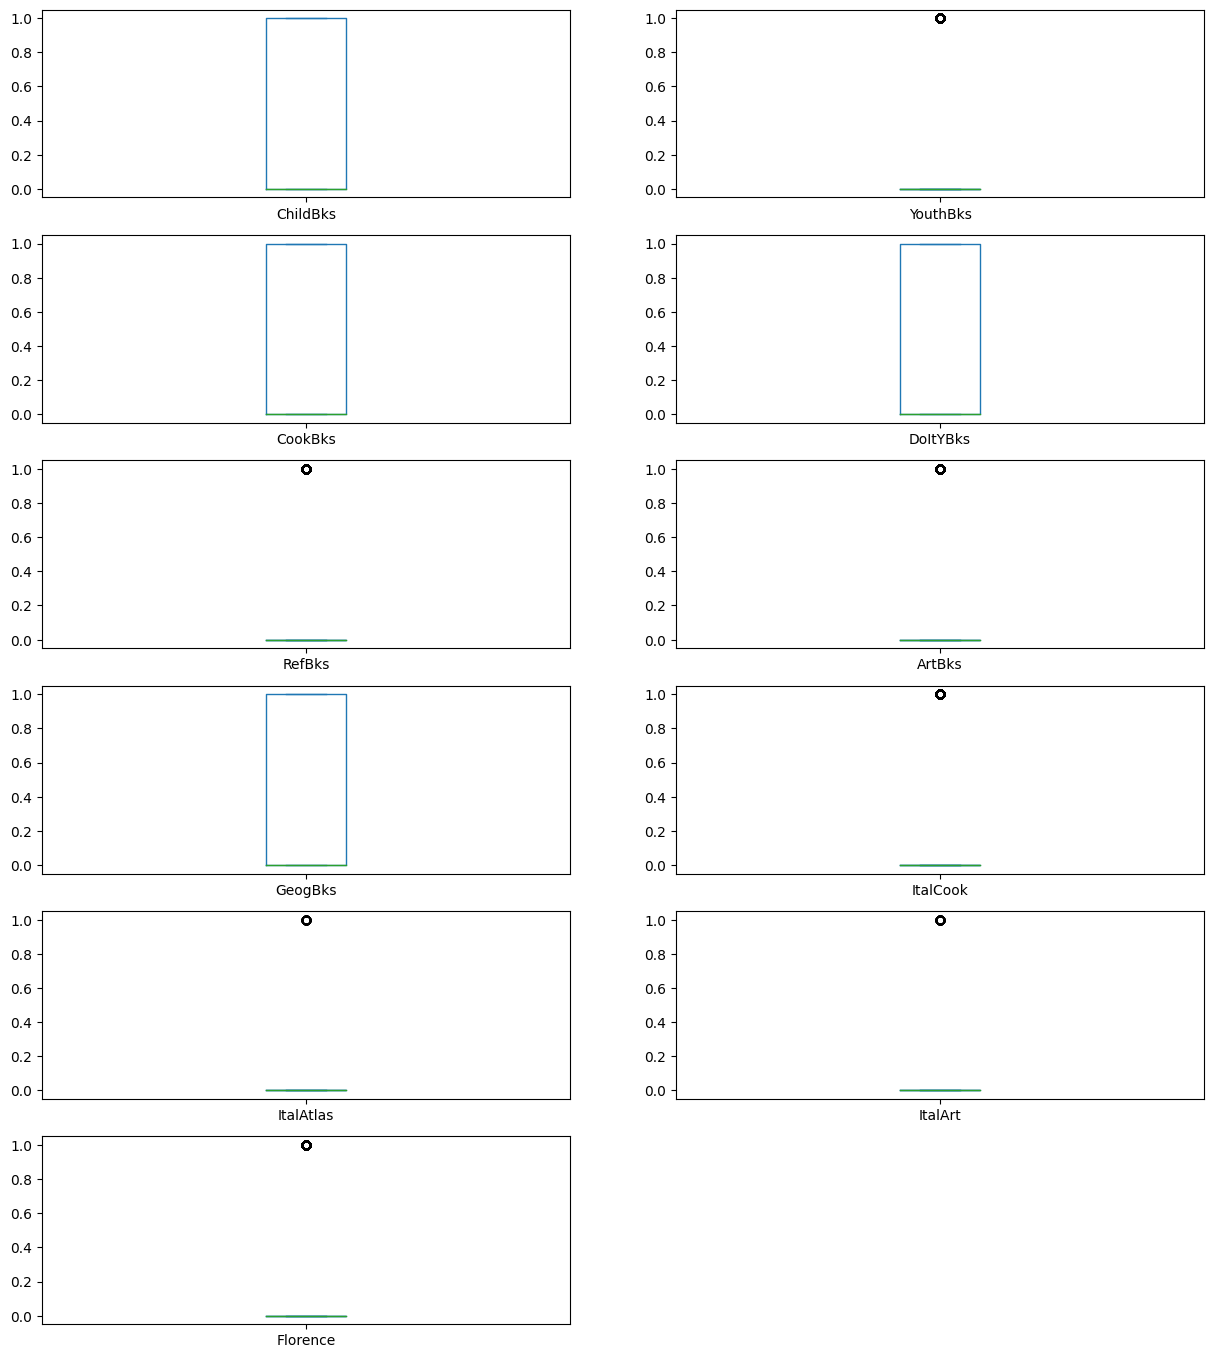

In [7]:
# Box plot find the outliers 

box_plot = book_df.plot(kind="box",subplots=True,layout=(7,2),figsize=(15,20));

# Calculate the IQR for each variable
Q1 = book_df.quantile(0.25)
Q3 = book_df.quantile(0.75)
IQR = Q3 - Q1

# Set the IQR multiplier for identifying potential outliers
IQR_multiplier = 1.5  # Adjust as needed

# Get the indices of the outliers
outlier_indices = []

for col, ax in zip(book_df.columns, box_plot):
    outliers = ((book_df[col] < (Q1[col] - IQR_multiplier * IQR[col])) | (book_df[col] > (Q3[col] + IQR_multiplier * IQR[col])))
    col_outlier_indices = book_df.index[outliers]
    outlier_indices.extend(col_outlier_indices)

outlier_indices = list(set(outlier_indices))  # Remove duplicate indices

# Display the outlier indices
print("Indices of outliers from the box plots:")
print(outlier_indices)
print(len(outlier_indices))

# Model Building using cosine simillarties score.

In [8]:
#Calculating Cosine Similarity between Users
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation

In [9]:
user_sim = 1 - pairwise_distances(book_df.values,metric='cosine')

In [10]:
user_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

### Store the results in a dataframe

In [60]:
sim_user_df = pd.DataFrame(user_sim)

### Set the index and column names to user ids 

In [61]:
sim_user_df.index = book_df.index.unique()
sim_user_df.columns = book_df.index.unique()

In [62]:
sim_user_df

,0,1,2,3,4,5,6,7,8,9,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
0,0.000000,0.000000,0.0,0.516398,0.408248,0.000000,0.577350,0.408248,0.408248,0.577350,...,0.516398,0.000000,0.654654,0.0,0.0,0.235702,0.0,0.0,0.000000,0.0
1,0.000000,0.000000,0.0,0.447214,0.000000,0.577350,0.000000,0.000000,0.707107,0.500000,...,0.447214,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
2,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
3,0.516398,0.447214,0.0,0.000000,0.632456,0.258199,0.447214,0.632456,0.316228,0.894427,...,0.600000,0.000000,0.507093,0.0,0.0,0.365148,0.0,0.0,0.447214,0.0
4,0.408248,0.000000,0.0,0.632456,0.000000,0.000000,0.000000,0.000000,0.000000,0.707107,...,0.632456,0.000000,0.534522,0.0,0.0,0.577350,0.0,0.0,0.707107,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.235702,0.000000,0.0,0.365148,0.577350,0.471405,0.000000,0.000000,0.000000,0.408248,...,0.547723,0.408248,0.771517,0.0,0.0,0.000000,0.0,0.0,0.408248,0.0
1996,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
1997,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
1998,0.000000,0.000000,0.0,0.447214,0.707107,0.000000,0.000000,0.000000,0.000000,0.500000,...,0.447214,0.000000,0.377964,0.0,0.0,0.408248,0.0,0.0,0.000000,0.0


### Fill the diagonal with the zero. 

In [64]:
np.fill_diagonal(user_sim, 0)
sim_user_df

,0,1,2,3,4,5,6,7,8,9,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
0,0.000000,0.000000,0.0,0.516398,0.408248,0.000000,0.577350,0.408248,0.408248,0.577350,...,0.516398,0.000000,0.654654,0.0,0.0,0.235702,0.0,0.0,0.000000,0.0
1,0.000000,0.000000,0.0,0.447214,0.000000,0.577350,0.000000,0.000000,0.707107,0.500000,...,0.447214,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
2,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
3,0.516398,0.447214,0.0,0.000000,0.632456,0.258199,0.447214,0.632456,0.316228,0.894427,...,0.600000,0.000000,0.507093,0.0,0.0,0.365148,0.0,0.0,0.447214,0.0
4,0.408248,0.000000,0.0,0.632456,0.000000,0.000000,0.000000,0.000000,0.000000,0.707107,...,0.632456,0.000000,0.534522,0.0,0.0,0.577350,0.0,0.0,0.707107,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.235702,0.000000,0.0,0.365148,0.577350,0.471405,0.000000,0.000000,0.000000,0.408248,...,0.547723,0.408248,0.771517,0.0,0.0,0.000000,0.0,0.0,0.408248,0.0
1996,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
1997,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
1998,0.000000,0.000000,0.0,0.447214,0.707107,0.000000,0.000000,0.000000,0.000000,0.500000,...,0.447214,0.000000,0.377964,0.0,0.0,0.408248,0.0,0.0,0.000000,0.0


### Most Similar Users

In [69]:
most_simuser_df = pd.DataFrame(sim_user_df.idxmax(axis=1))
most_simuser_df

,0
0,231
1,21
2,0
3,158
4,11
...,...
1995,63
1996,0
1997,0
1998,16


### Some of the similar users 

In [16]:
book_df[(book_df.index==0) | (book_df.index==231)|(book_df.index==2) | (book_df.index==1996) | (book_df.index==1997) | (book_df.index==1999)]


,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
231,0,1,0,1,0,0,1,0,0,0,0
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1999,0,0,0,0,0,0,0,0,0,0,0


## Using clustering to find group of similar users and do recommendations based on these clusters  

## K-means clustering

### To choose the optimum cluster we use elbow method. 


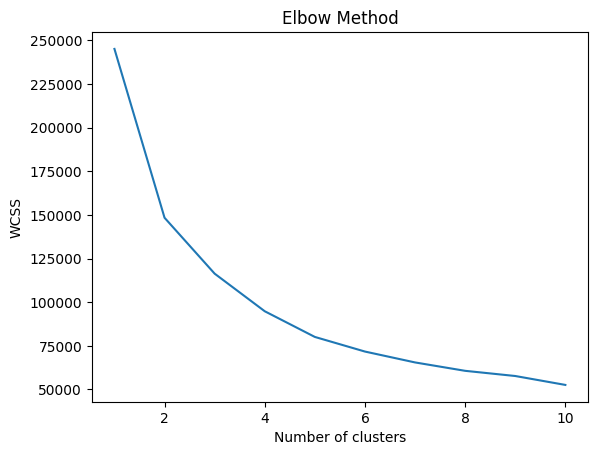

In [67]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(sim_user_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### After the 7 clusters the slope is almost constant. Hence 7 is optimum cluster value. 

### Building cluster model 

In [94]:
#Build Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(7, random_state=42)
clusters_new.fit(sim_user_df)

KMeans(n_clusters=7, random_state=42)

In [95]:
clusters_new.labels_

array([6, 4, 2, ..., 2, 3, 2])

In [96]:
#Assign clusters to the data set
most_simuser_df['clusterid_new'] = clusters_new.labels_

In [104]:
most_simuser_df.head(2)

,Similar_User_id,clusterid_new
0,231,6
1,21,4


In [105]:
# Reset the index and use it as 'UserID'
most_simuser_df.reset_index(inplace=True)
most_simuser_df.rename(columns={'index': 'UserID'}, inplace=True)

In [106]:
most_simuser_df.head(2)

,UserID,Similar_User_id,clusterid_new
0,0,231,6
1,1,21,4


## Count the number of user in each cluster 

In [107]:
# Count the number of user IDs in each cluster
cluster_counts = most_simuser_df['clusterid_new'].value_counts()

# Display the cluster counts
print(cluster_counts)

2    479
5    370
3    300
4    276
0    250
1    214
6    111
Name: clusterid_new, dtype: int64


## Visualization of the cluster formed based on similar users  

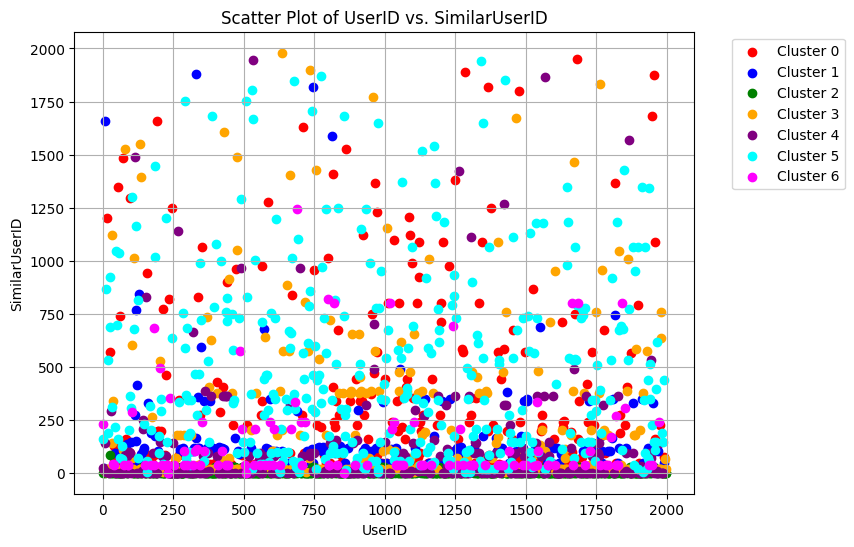

In [109]:
import matplotlib.pyplot as plt

# Define colors for clusters
cluster_colors = {
    0: 'red', 1: 'blue', 2: 'green', 3: 'orange',
    4: 'purple', 5: 'cyan', 6: 'magenta'
}

# Create a scatter plot
plt.figure(figsize=(8, 6))
for cluster, color in cluster_colors.items():
    cluster_data = most_simuser_df[most_simuser_df['clusterid_new'] == cluster]
    plt.scatter(cluster_data['UserID'], cluster_data['Similar_User_id'], label=f'Cluster {cluster}', c=color, marker='o')

plt.xlabel('UserID')
plt.ylabel('SimilarUserID')
plt.title('Scatter Plot of UserID vs. SimilarUserID')
# Place the legend outside the graph
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.grid(True)
plt.show()

## Create clusters based on similar user id. Creating dataframe based on the unique similar user id.  

In [110]:
# Get unique values in the 'Similar_User_id' column
unique_values = most_simuser_df['Similar_User_id'].unique()

In [112]:
len(unique_values)

400

In [116]:
# Count the number of unique users for each category (SimilarUserID)
unique_user_counts = most_simuser_df.groupby('Similar_User_id')['UserID'].nunique().reset_index()

# Rename the columns for clarity
unique_user_counts.columns = ['SimilarUserID', 'UniqueUserCount']

# Print the result
print(unique_user_counts)

     SimilarUserID  UniqueUserCount
0                0              424
1                1              135
2                3                7
3                4               15
4                5                2
..             ...              ...
395           1900                1
396           1939                1
397           1946                1
398           1950                1
399           1980                1

[400 rows x 2 columns]


## Visualizing clusters based on the unique similar user count.. 

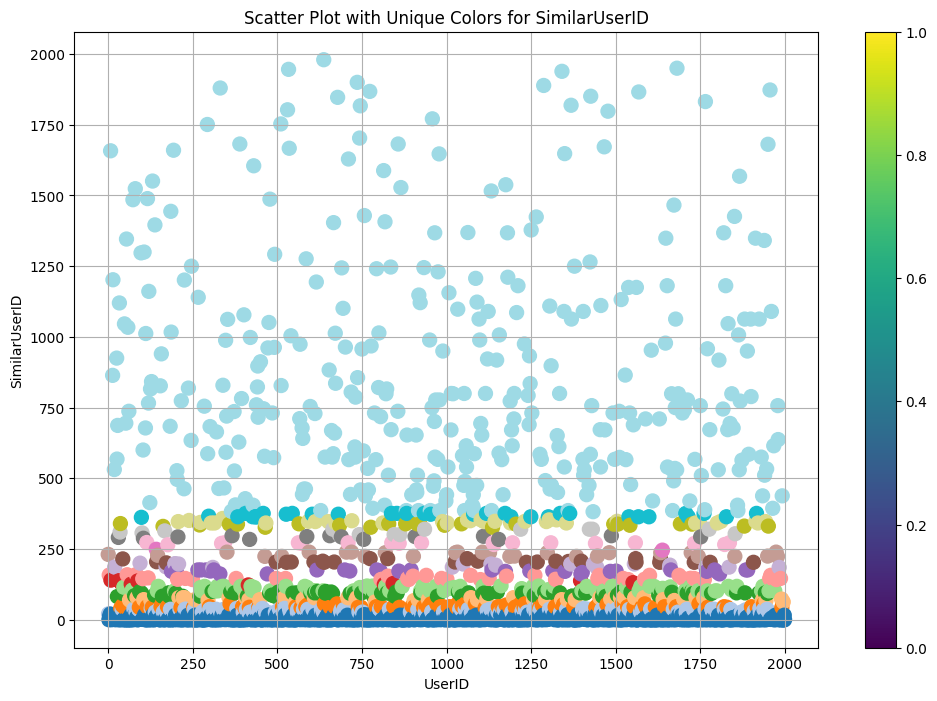

In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Create a colormap with 400 distinct colors
cmap = plt.get_cmap('tab20', 400)

# Map SimilarUserID values to colors
most_simuser_df['Color'] = most_simuser_df['Similar_User_id'].map(lambda x: cmap(x - 1))  # Subtract 1 to match the colormap index (1 to 400)

# Create a scatter plot with colors
plt.figure(figsize=(12, 8))
plt.scatter(most_simuser_df['UserID'], most_simuser_df['Similar_User_id'], c=most_simuser_df['Color'], cmap=cmap, marker='o', s=100)
plt.xlabel('UserID')
plt.ylabel('SimilarUserID')
plt.title('Scatter Plot with Unique Colors for SimilarUserID')
plt.colorbar()
plt.grid(True)
plt.show()

## Scatter plot of Unique user count annotated with similar user id count. This can be used to see which user id has most occurence and help for more efficient recommendation system.

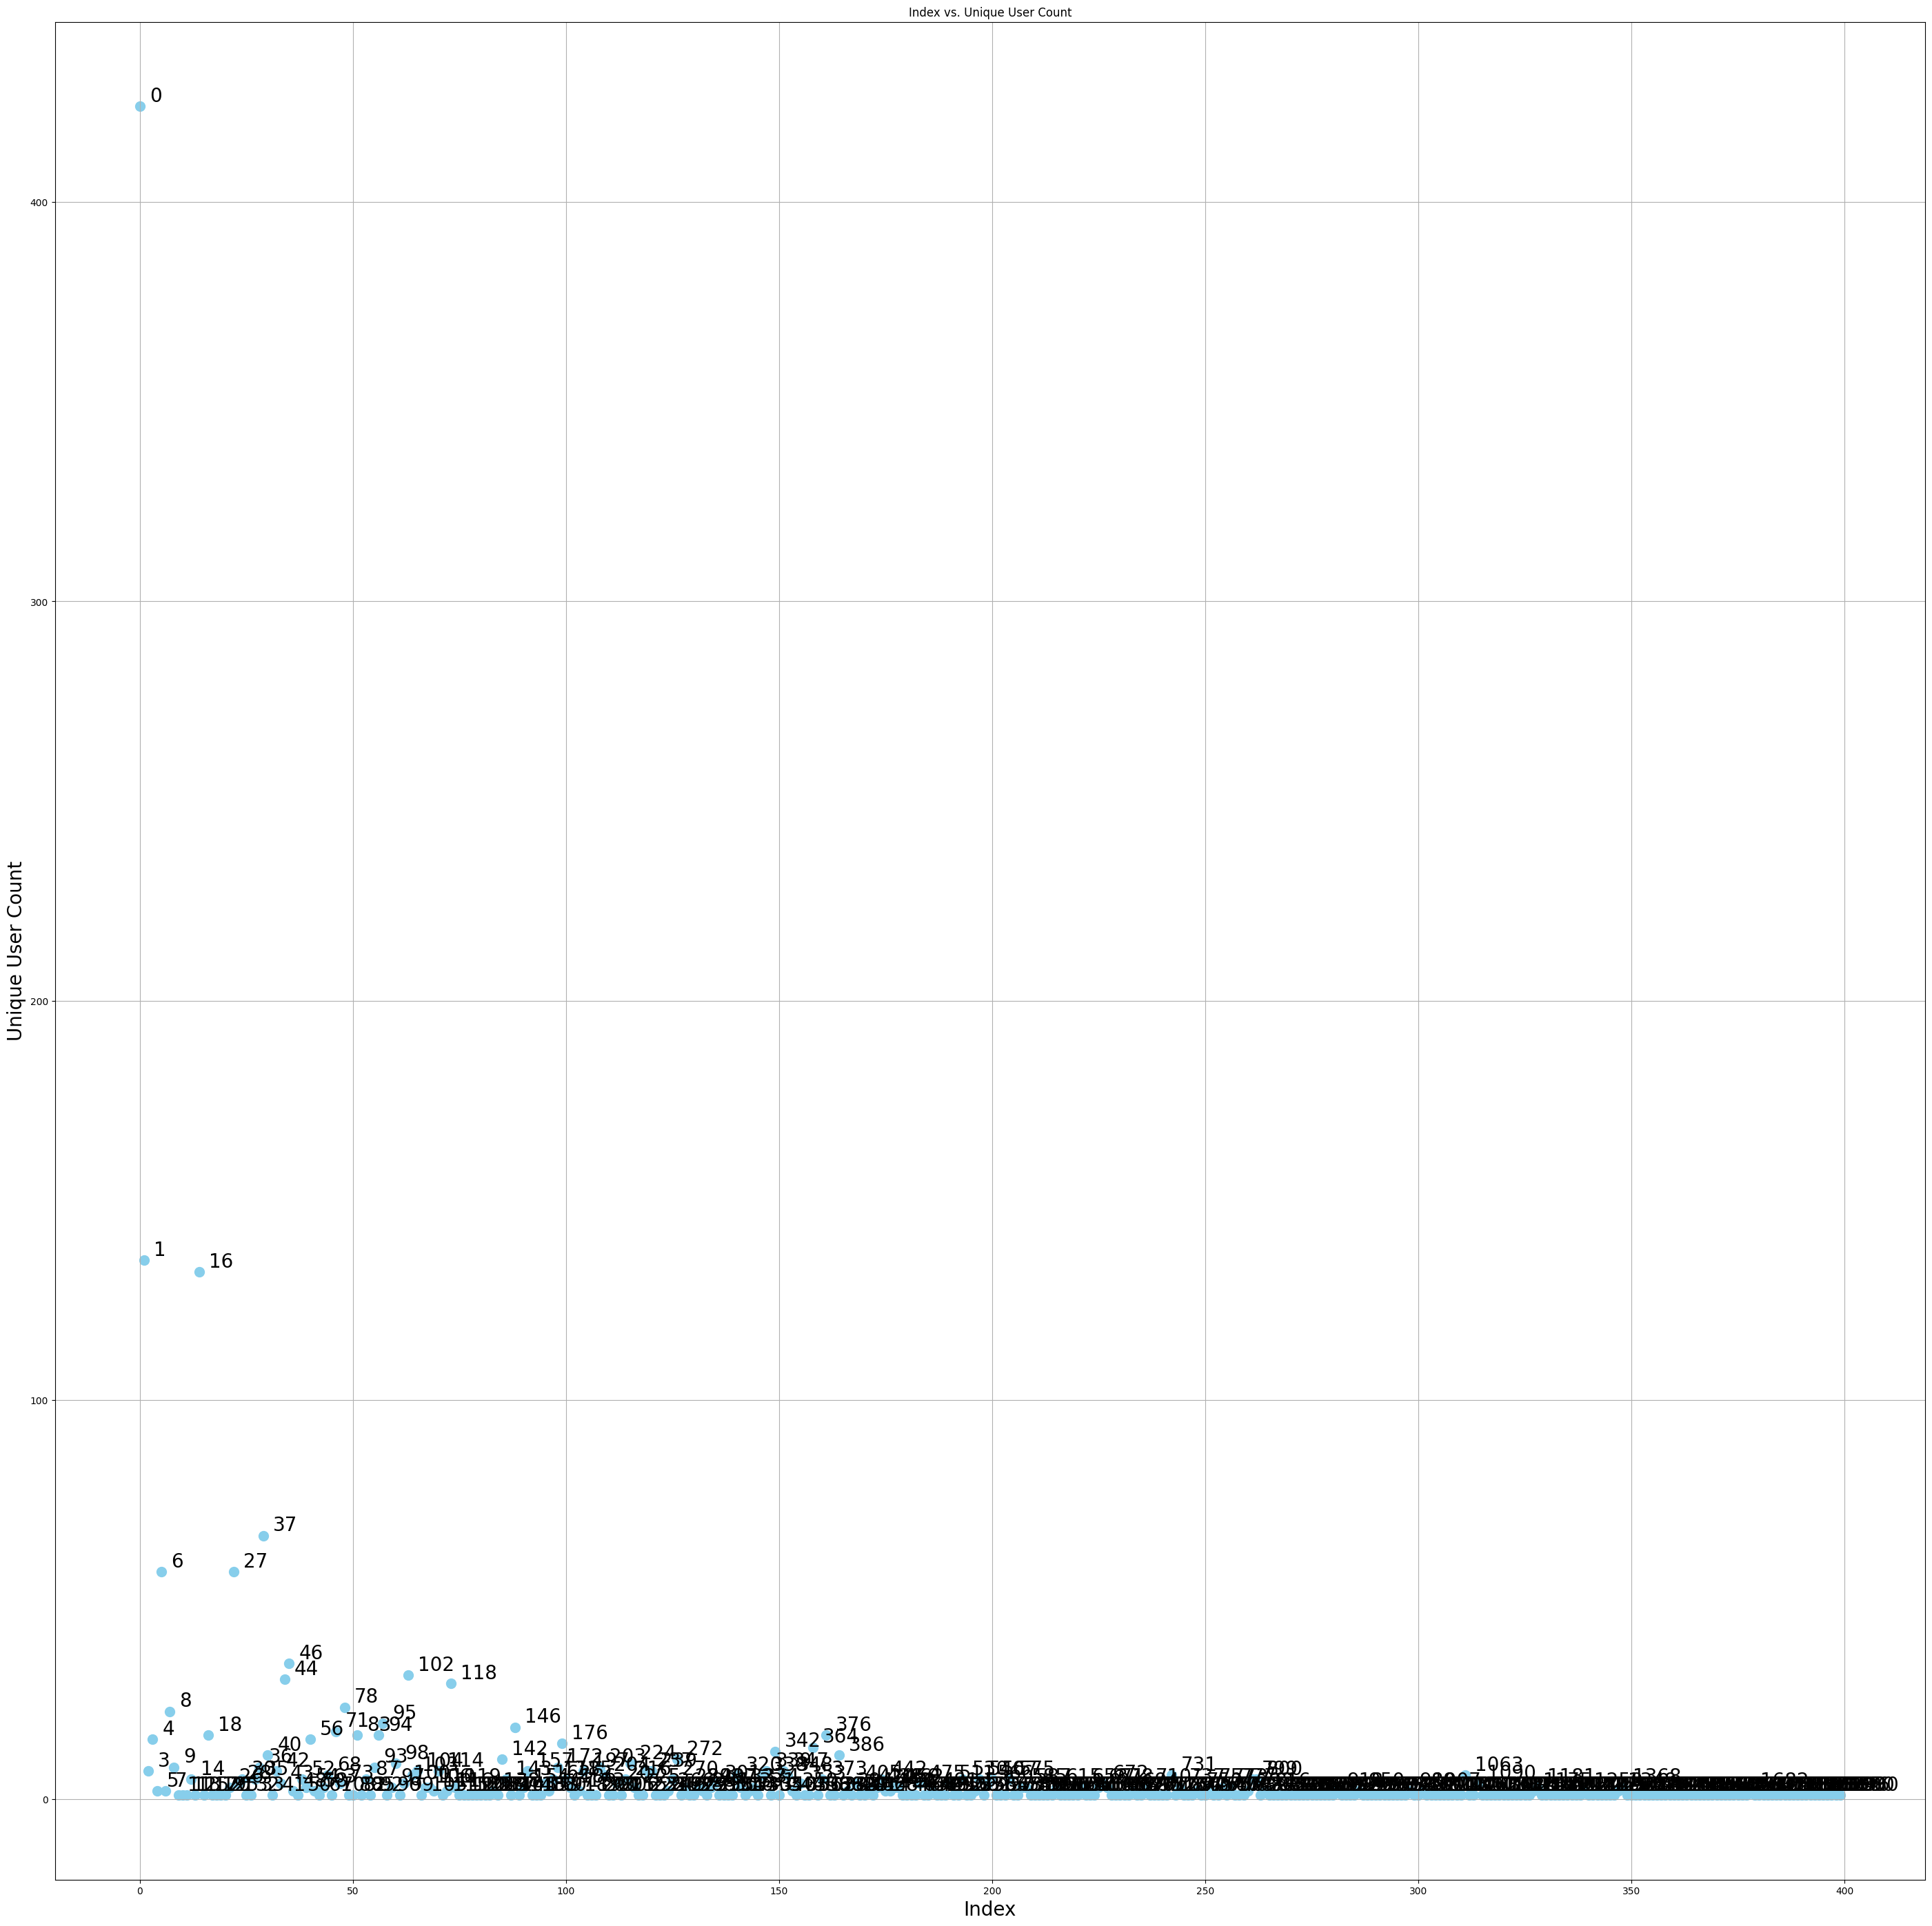

In [144]:
# Create a scatter plot
plt.figure(figsize=(35, 35))
plt.scatter(unique_user_counts.index, unique_user_counts['UniqueUserCount'], color='skyblue', marker='o', s=100)
plt.xlabel('Index', fontsize=20)
plt.ylabel('Unique User Count', fontsize=20)
plt.title('Index vs. Unique User Count')
plt.grid(True)

# Annotate the points with SimilarUserID
for i, row in unique_user_counts.iterrows():
    plt.annotate(f'{row["SimilarUserID"]}', (i, row['UniqueUserCount']), xytext=(10, 5), textcoords='offset points', fontsize=20)

plt.show()